# Projeto final

Bem vindo ao projeto final do curso/módulo de Pandas.
Neste projeto, você deve responder a um conjunto de perguntas feitas a dois conjuntos de dados:

1. [Obesity among adults by country, 1975-2016](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016/)
2. [GDP Per Person (1901-2011)](https://www.kaggle.com/divyansh22/gdp-per-person-19012011?select=GDP.csv)

Tais conjuntos de dados são públicos foram publicados no Kaggle. Mais instruções sobre cada um deles podem ser encontrados nos links acima. Você também os encontrará na pasta `Datasets`, dentro de nossas apostilas.

In [138]:
import pandas as pd
import numpy as np

## Perguntas - Obesity among adults by country, 1975-2016

In [139]:
df_obesity = pd.read_csv(r"C:\Users\arthu\OneDrive\Documentos\GitHub\Telegram\Python para Data Science e Machine Learning\Módulo 2 - Analisando Dados com Pandas\Dados\obesity_cleaned.csv")
df_obesity

,Unnamed: 0,Country,Year,Obesity (%),Sex
0,0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,4,Afghanistan,1976,0.2 [0.0-0.7],Male
...,...,...,...,...,...
24565,24565,Zimbabwe,2015,4.5 [2.4-7.6],Male
24566,24566,Zimbabwe,2015,24.8 [18.9-31.3],Female
24567,24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes
24568,24568,Zimbabwe,2016,4.7 [2.5-8.0],Male


- Limpe os dados do DataFrame, criando uma coluna de nome 'Obesity' que conterá os valores de obesidade. Transforme em float as colunas que porventura foram importadas como string.

In [140]:
df_obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24570 entries, 0 to 24569
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   24570 non-null  int64 
 1   Country      24570 non-null  object
 2   Year         24570 non-null  int64 
 3   Obesity (%)  24570 non-null  object
 4   Sex          24570 non-null  object
dtypes: int64(2), object(3)
memory usage: 959.9+ KB


In [141]:
df_obesity.value_counts()

Unnamed: 0  Country      Year  Obesity (%)       Sex       
0           Afghanistan  1975  0.5 [0.2-1.1]     Both sexes    1
16376       Pakistan     2015  10.8 [7.3-15.0]   Female        1
16385       Palau        1976  36.0 [25.7-46.8]  Female        1
16384       Palau        1976  22.3 [13.6-32.7]  Male          1
16383       Palau        1976  28.9 [22.1-36.1]  Both sexes    1
                                                              ..
8188        Gambia       2016  5.6 [2.9-9.3]     Male          1
8187        Gambia       2016  10.3 [7.5-13.6]   Both sexes    1
8186        Gambia       2015  14.3 [9.9-19.4]   Female        1
8185        Gambia       2015  5.3 [2.8-8.8]     Male          1
24569       Zimbabwe     2016  25.3 [19.1-32.0]  Female        1
Length: 24570, dtype: int64

In [142]:
df_obesity["Obesity (%)"].value_counts()

No data            504
0.4 [0.1-1.0]       55
0.6 [0.2-1.3]       47
0.3 [0.1-0.7]       46
0.3 [0.1-0.8]       46
                  ... 
9.5 [6.7-13.1]       1
4.4 [2.2-7.6]        1
14.1 [9.1-20.3]      1
9.8 [6.9-13.4]       1
4.7 [2.5-8.0]        1
Name: Obesity (%), Length: 16375, dtype: int64

In [143]:
del df_obesity["Unnamed: 0"]
df_obesity

,Country,Year,Obesity (%),Sex
0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,Afghanistan,1976,0.2 [0.0-0.7],Male
...,...,...,...,...
24565,Zimbabwe,2015,4.5 [2.4-7.6],Male
24566,Zimbabwe,2015,24.8 [18.9-31.3],Female
24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes
24568,Zimbabwe,2016,4.7 [2.5-8.0],Male


In [144]:
df_obesity["Obesity (%)"].iloc[0].split()

['0.5', '[0.2-1.1]']

In [145]:
df_obesity["Obesity"] = df_obesity["Obesity (%)"].apply(lambda x : x.split()[0])
df_obesity["Obesity"]

0         0.5
1         0.2
2         0.8
3         0.5
4         0.2
         ... 
24565     4.5
24566    24.8
24567    15.5
24568     4.7
24569    25.3
Name: Obesity, Length: 24570, dtype: object

In [146]:
df_obesity["Obesity"].value_counts()

No      504
0.4     222
0.6     218
0.5     217
0.7     210
       ... 
60.1      1
56.3      1
59.8      1
55.5      1
46.5      1
Name: Obesity, Length: 602, dtype: int64

In [147]:
df_obesity.loc[df_obesity["Obesity"] == "No", "Obesity"] = np.nan

In [148]:
df_obesity["Obesity"] = df_obesity["Obesity"].dropna()
df_obesity["Obesity"].value_counts()

0.4     222
0.6     218
0.5     217
0.7     210
0.8     201
       ... 
62.1      1
56.8      1
54.1      1
60.0      1
46.5      1
Name: Obesity, Length: 601, dtype: int64

In [149]:
df_obesity["Obesity"] = df_obesity["Obesity"].apply(lambda x: float(x))
df_obesity["Year"] = df_obesity["Year"].apply(lambda x: int(x))
df_obesity

,Country,Year,Obesity (%),Sex,Obesity
0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes,0.5
1,Afghanistan,1975,0.2 [0.0-0.6],Male,0.2
2,Afghanistan,1975,0.8 [0.2-2.0],Female,0.8
3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes,0.5
4,Afghanistan,1976,0.2 [0.0-0.7],Male,0.2
...,...,...,...,...,...
24565,Zimbabwe,2015,4.5 [2.4-7.6],Male,4.5
24566,Zimbabwe,2015,24.8 [18.9-31.3],Female,24.8
24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes,15.5
24568,Zimbabwe,2016,4.7 [2.5-8.0],Male,4.7


In [150]:
df_obesity.set_index("Year", inplace=True)

- Qual o percentual médio de obesidade por sexo no mundo no ano de 2015?

In [151]:
# NESSA PARTE EUTAVA FAZENDO UAMS PARADA MO COMPLICADA E VEIO O CARA E RESOLVE NUME LINHA
df_obesity[df_obesity.index == 2015].groupby("Sex").mean()

C:\Users\arthu\AppData\Local\Temp\ipykernel_2524\445268348.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_obesity[df_obesity.index == 2015].groupby("Sex").mean()


,Obesity
Sex,
Both sexes,19.508377
Female,22.899476
Male,15.980628


- Quais são os 5 países com a maior e a menor taxa de aumento nos índices de obesidade no período observado?

In [152]:
# NA BOA, N TO BEM PRA ESTUDA N
df_Gorno_inicial = df_obesity[df_obesity.index == 1975]
df_Gorno_final = df_obesity[df_obesity.index == 2016]

df_Gorno_inicial.set_index("Country", inplace=True)
df_Gorno_final.set_index("Country", inplace=True)

In [153]:
df_Gordo_Evolution = df_Gorno_final[df_Gorno_final["Sex"] == "Both sexes"]["Obesity"] - df_Gorno_inicial[df_Gorno_inicial["Sex"] == "Both sexes"]["Obesity"]
df_Gordo_Evolution.sort_values()

Country
Viet Nam        2.0
Singapore       3.1
Japan           3.3
Bangladesh      3.4
Timor-Leste     3.6
               ... 
Tuvalu         33.7
Monaco          NaN
San Marino      NaN
South Sudan     NaN
Sudan           NaN
Name: Obesity, Length: 195, dtype: float64

In [154]:
df_Gordo_Evolution.dropna().tail()

Country
Venezuela (Bolivarian Republic of)    16.0
Viet Nam                               2.0
Yemen                                 14.3
Zambia                                 6.6
Zimbabwe                              11.8
Name: Obesity, dtype: float64

In [155]:
df_Gordo_Evolution.dropna().head()

Country
Afghanistan     5.0
Albania        15.2
Algeria        20.5
Andorra        12.7
Angola          7.4
Name: Obesity, dtype: float64

- Quais os países com maiores e menores níveis percetuais de obesidade em 2015?

In [156]:
df2K15 = df_obesity[df_obesity.index == 2015]
df2K15[df2K15["Obesity"] == df2K15["Obesity"].max()]

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015,Nauru,63.1 [55.5-70.3],Female,63.1


- Qual a diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil?

In [157]:
dfBrasil = df_obesity[df_obesity["Country"] == "Brazil"]
dfBrasil

,Country,Obesity (%),Sex,Obesity
Year,,,,
1975,Brazil,5.2 [3.3-7.9],Both sexes,5.2
1975,Brazil,3.0 [1.4-5.7],Male,3.0
1975,Brazil,7.3 [4.0-12.0],Female,7.3
1976,Brazil,5.5 [3.5-8.1],Both sexes,5.5
1976,Brazil,3.2 [1.5-5.8],Male,3.2
...,...,...,...,...
2015,Brazil,18.0 [13.9-22.6],Male,18.0
2015,Brazil,24.9 [20.3-29.8],Female,24.9
2016,Brazil,22.1 [18.7-25.7],Both sexes,22.1


In [158]:
# EU SINTO Q EU TO FERRADO, TO ENTENDEDO + É ND, + TEM Q ESTUDA PQ AI EU SLA
df_resultado = dfBrasil[dfBrasil["Sex"] == "Female"]["Obesity"] - dfBrasil[dfBrasil["Sex"] == "Male"]["Obesity"]
df_resultado

Year
1975    4.3
1976    4.4
1977    4.6
1978    4.7
1979    4.9
1980    4.9
1981    5.1
1982    5.2
1983    5.4
1984    5.5
1985    5.6
1986    5.7
1987    5.8
1988    5.9
1989    6.0
1990    6.1
1991    6.1
1992    6.3
1993    6.3
1994    6.4
1995    6.4
1996    6.5
1997    6.6
1998    6.7
1999    6.8
2000    6.8
2001    6.8
2002    6.8
2003    6.9
2004    6.9
2005    6.9
2006    6.9
2007    7.0
2008    6.9
2009    7.0
2010    7.0
2011    6.9
2012    6.9
2013    6.9
2014    6.9
2015    6.9
2016    6.9
Name: Obesity, dtype: float64

<Axes: xlabel='Year'>

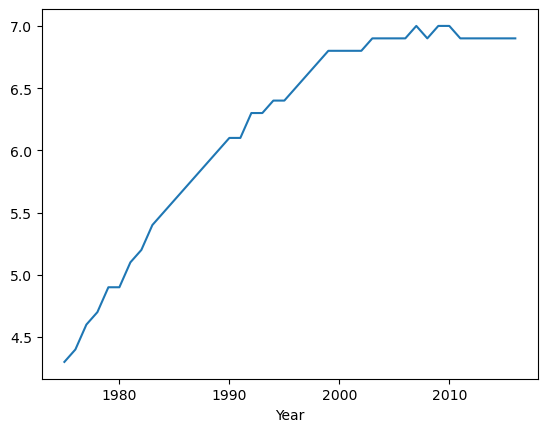

In [159]:
df_resultado.plot()

- Você conseguiria plotar um gráfico mostrando a evolução da obesidade para ambos sexos no mundo?

<Axes: xlabel='Year'>

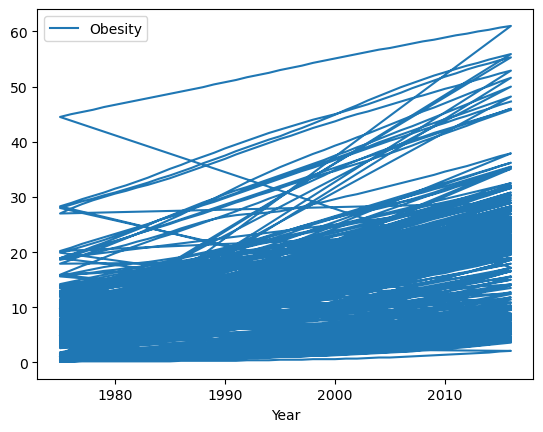

In [160]:
dfAmbos = df_obesity[df_obesity["Sex"] ==  "Both sexes"]
dfAmbos.plot()
# ISSU AKI FOI EU ZUANDO

In [161]:
dfAmbos

,Country,Obesity (%),Sex,Obesity
Year,,,,
1975,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1976,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1977,Afghanistan,0.6 [0.2-1.2],Both sexes,0.6
1978,Afghanistan,0.6 [0.2-1.3],Both sexes,0.6
1979,Afghanistan,0.6 [0.3-1.3],Both sexes,0.6
...,...,...,...,...
2012,Zimbabwe,14.3 [11.4-17.6],Both sexes,14.3
2013,Zimbabwe,14.6 [11.5-18.0],Both sexes,14.6
2014,Zimbabwe,14.9 [11.7-18.4],Both sexes,14.9


<Axes: xlabel='Year'>

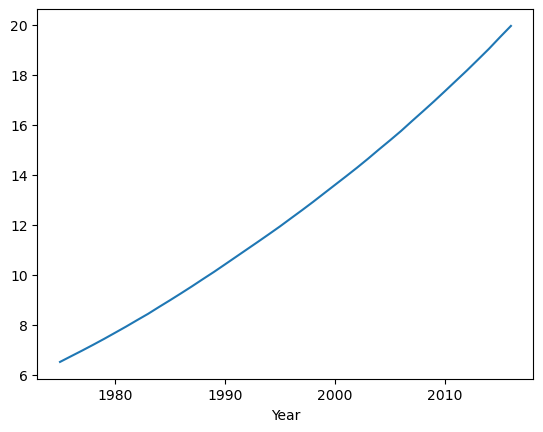

In [162]:
dfAmbos.groupby("Year")["Obesity"].mean().plot()

## Perguntas - GDP Per Person (1901-2011)

In [163]:
df_gdp = pd.read_csv(r"C:\Users\arthu\OneDrive\Documentos\GitHub\Telegram\Python para Data Science e Machine Learning\Módulo 2 - Analisando Dados com Pandas\Dados\GDP.csv", decimal=".")
df_gdp

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1/1/1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1/1/1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,1/1/2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,1/1/2006,520.17


- Limpe o conjunto de dados, convertendo strings em datas ou float, quando necessário.

In [164]:
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Country   4419 non-null   object
 1   Region    4419 non-null   object
 2   Year      4419 non-null   object
 3    GDP_pp   4419 non-null   object
dtypes: object(4)
memory usage: 138.2+ KB


In [165]:
df_gdp["Year"] = df_gdp["Year"].apply(lambda x : int(x.split("/")[-1]))
df_gdp

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17


In [166]:
# ESTOY AH CORINGAR
float(df_gdp[" GDP_pp "].iloc[0].split()[0])

613.99

In [167]:
df_gdp["gdp_pp"] = df_gdp[" GDP_pp "].apply(lambda x : float( x.split()[0].replace(",","") ))
del df_gdp[" GDP_pp "]
df_gdp

,Country,Region,Year,gdp_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17


- Você conseguiria informar o primeiro valor registrado de cada país?

In [168]:
df_gdp.groupby("Country")[["Year","gdp_pp"]].min()

,Year,gdp_pp
Country,,
Afghanistan,1901,595.04
Albania,1901,1062.01
Algeria,1901,1807.76
Andorra,1901,3352.50
Angola,1901,525.76
...,...,...
Venezuela,1901,766.21
Vietnam,1901,572.96
"Yemen, Rep.",1901,729.39


- Informe as regiões com maiores crescimentos de PIB per capita no século passado.

In [169]:
df_gdp_inicial = df_gdp[df_gdp["Year"] == 1901]

In [170]:
df_gdp[df_gdp["Year"] < 2000].max()

Country              Zimbabwe
Region     Sub-Saharan Africa
Year                     1996
gdp_pp               118681.3
dtype: object

In [171]:
df_gdp_final = df_gdp[df_gdp["Year"] == 1996]

In [172]:
## TEM UMA PUTA EXPLICAÇÃO PRA ISSO AKI, SÓ Q EU N LEMBRO QQ O CARA FALOU E O CODIGO COMPILOU, ENTÃO N MEXE
((df_gdp_final.groupby("Region")["gdp_pp"].mean() / df_gdp_inicial.groupby("Region")["gdp_pp"].mean() - 1) * 100).sort_values()

Region
Sub-Saharan Africa                               248.633780
South America                                    312.123735
Australia and Oceania                            396.075383
Central America and the Caribbean                406.426789
North America                                    589.760175
Europe                                           594.046167
Asia                                             711.761516
Middle East, North Africa, and Greater Arabia    857.215950
Name: gdp_pp, dtype: float64

- Preecha os anos ausentes em cada país com uma estimativa, baseada na diferença entre o próximo registro e o anterior.

In [173]:
# ESSSA QUESTÃO DAKI O MONSTER N VAI DA CONTA
listaAno = np.arange(df_gdp["Year"].min(), df_gdp["Year"].max())
listaAno

array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010])

In [174]:
dfAnos = pd.DataFrame(listaAno, columns=["Year"])
dfAnos

,Year
0,1901
1,1902
2,1903
3,1904
4,1905
...,...
105,2006
106,2007
107,2008
108,2009


In [175]:
dfAnos.index = dfAnos["Year"]
dfAnos

,Year
Year,
1901,1901
1902,1902
1903,1903
1904,1904
1905,1905
...,...
2006,2006
2007,2007
2008,2008


In [176]:
# vai retornar true ou false SE akele ano estiver no df_gdp
# e como é pra pegar aqueles que NÃO estão la, coloca 1 ~ na frente q inverte
dfPresentes = -dfAnos["Year"].isin(df_gdp["Year"])
dfPresentes

Year
1901    False
1902     True
1903     True
1904     True
1905     True
        ...  
2006    False
2007     True
2008     True
2009     True
2010     True
Name: Year, Length: 110, dtype: bool

In [177]:
dfPresentes = dfAnos.loc[dfPresentes].index
dfPresentes

Int64Index([1902, 1903, 1904, 1905, 1907, 1908, 1909, 1910, 1912, 1913, 1914,
            1915, 1917, 1918, 1919, 1920, 1922, 1923, 1924, 1925, 1927, 1928,
            1929, 1930, 1932, 1933, 1934, 1935, 1937, 1938, 1939, 1940, 1942,
            1943, 1944, 1945, 1947, 1948, 1949, 1950, 1952, 1953, 1954, 1955,
            1957, 1958, 1959, 1960, 1962, 1963, 1964, 1965, 1967, 1968, 1969,
            1970, 1972, 1973, 1974, 1975, 1977, 1978, 1979, 1980, 1982, 1983,
            1984, 1985, 1987, 1988, 1989, 1990, 1992, 1993, 1994, 1995, 1997,
            1998, 1999, 2000, 2002, 2003, 2004, 2005, 2007, 2008, 2009, 2010],
           dtype='int64', name='Year')

In [178]:
df_gdp = df_gdp.sort_values(["Country", "Year"])
df_gdp["delta_gdp"] = df_gdp["gdp_pp"] - df_gdp["gdp_pp"].shift(1)
df_gdp["delta_year"] = df_gdp["Year"] - df_gdp["Year"].shift(1)
df_gdp

,Country,Region,Year,gdp_pp,delta_gdp,delta_year
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,NaN,NaN
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,10.05,5.0
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,10.21,5.0
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,13.03,5.0
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,15.12,5.0
...,...,...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09,39.79,5.0
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50,-0.59,5.0
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96,-61.54,5.0
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17,-199.79,5.0


In [179]:
df_gdp["gdp_year"] = (df_gdp["delta_gdp"] / df_gdp["delta_year"]).shift(-1)
df_gdp

,Country,Region,Year,gdp_pp,delta_gdp,delta_year,gdp_year
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,NaN,NaN,2.010
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,10.05,5.0,2.042
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,10.21,5.0,2.606
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,13.03,5.0,3.024
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,15.12,5.0,3.094
...,...,...,...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09,39.79,5.0,-0.118
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50,-0.59,5.0,-12.308
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96,-61.54,5.0,-39.958
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17,-199.79,5.0,1.232


In [180]:
df_gdp["next_year"] = df_gdp["Year"].shift(-1)
del df_gdp["delta_gdp"], df_gdp["delta_year"]
df_gdp

,Country,Region,Year,gdp_pp,gdp_year,next_year
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.010,1906.0
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,2.042,1911.0
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,2.606,1916.0
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,3.024,1921.0
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40,3.094,1926.0
...,...,...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09,-0.118,1996.0
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50,-12.308,2001.0
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96,-39.958,2006.0
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17,1.232,2011.0


In [181]:
# EU NEM SEI + QQ EU TO FAZENDO, TO PERDIDO P KRL, FOI TD ISSO PRA CHEGA ATÉ AKI PRA RESOLVER O EXERCICIO
df_novaDATA = pd.DataFrame()

for idx, row in df_gdp.iterrows():
    # 2011 n tem dado ou n tem dado dps n tendi qq o prof falo
    if row["Year"] == 2011:
        continue
        
    add_anos = dfPresentes[(dfPresentes < row["next_year"]) & (dfPresentes > row["Year"])]
    
    for novoAno in add_anos:
        add_row = row.copy()
        # min 16 ele explica q porra ta contecendo daki p frente
        add_row["gdp_pp"] = (novoAno - add_row["Year"]) * add_row["gdp_year"] + add_row["gdp_pp"]
        add_row["Year"] = novoAno
        add_row["kind"] = "estimated"
        df_novaDATA = pd.concat([df_novaDATA, add_row.to_frame().transpose() ])

In [182]:
df_gdp = pd.concat([df_gdp, df_novaDATA])
df_gdp.sort_values(["Country", "Year"])
df_gdp.index = df_gdp["Year"]
df_gdp

,Country,Region,Year,gdp_pp,gdp_year,next_year,kind
Year,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.01,1906.0,NaN
1906,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,2.042,1911.0,NaN
1911,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,2.606,1916.0,NaN
1916,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,3.024,1921.0,NaN
1921,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.4,3.094,1926.0,NaN
...,...,...,...,...,...,...,...
2005,Zimbabwe,Sub-Saharan Africa,2005,560.128,-39.958,2006.0,estimated
2007,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated
2008,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated


In [183]:
df_gdp["kind"].fillna("real", inplace=True)
df_gdp

,Country,Region,Year,gdp_pp,gdp_year,next_year,kind
Year,,,,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99,2.01,1906.0,real
1906,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04,2.042,1911.0,real
1911,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25,2.606,1916.0,real
1916,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28,3.024,1921.0,real
1921,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.4,3.094,1926.0,real
...,...,...,...,...,...,...,...
2005,Zimbabwe,Sub-Saharan Africa,2005,560.128,-39.958,2006.0,estimated
2007,Zimbabwe,Sub-Saharan Africa,2007,521.402,1.232,2011.0,estimated
2008,Zimbabwe,Sub-Saharan Africa,2008,522.634,1.232,2011.0,estimated


<Axes: xlabel='Year', ylabel='gdp_pp'>

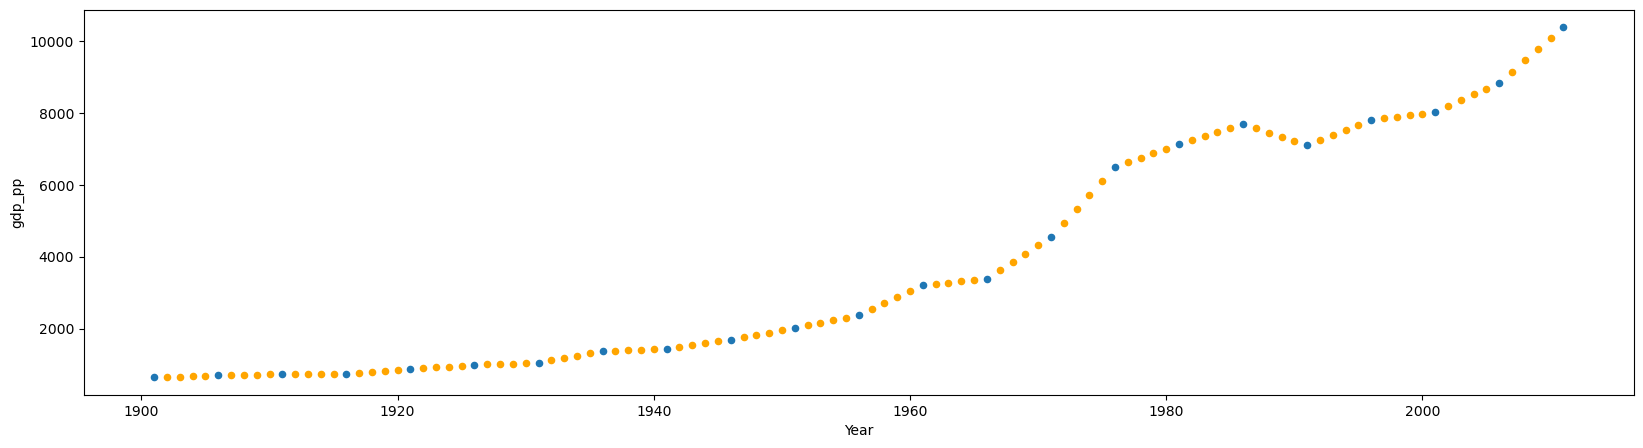

In [184]:
# isso aki é pra monstrar meçhor o resultado, eu ja n sei + de nd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,5))

country = "Brazil"
# eu tive q da reload na porra do kernel pra fazer isso aki rodar PQP
df_gdp[( df_gdp["kind"] == "real") & (df_gdp["Country"] == country )].plot(kind="scatter", y="gdp_pp", x="Year", ax=ax)
df_gdp[( df_gdp["kind"] == "estimated") & (df_gdp["Country"] == country )].plot(kind="scatter", y="gdp_pp", x="Year", ax=ax, color="orange")
# TÁ AI, NÃO SEI PQ EU TENHO Q FICA DANDO RESTART PRA SA PORRA PLOTAR + ELA TÁ AI

### DESAFIOS
- Você conseguiria criar um mapa do gdp ou da obesidade no mundo ao longo dos anos?

- Há uma relação entre níveis de obesidade e gdp per capita?